# importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

# importing the data set

In [2]:
df = pd.read_csv("Master_Product_Sales_Data.csv")

In [3]:
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Total Sales
0,Product_0993,Whse_J,Category_028,2012/7/27,100,13400
1,Product_0979,Whse_J,Category_028,2012/1/19,500,52500
2,Product_0979,Whse_J,Category_028,2012/2/3,500,52500
3,Product_0979,Whse_J,Category_028,2012/2/9,500,52500
4,Product_0979,Whse_J,Category_028,2012/3/2,500,52500
...,...,...,...,...,...,...
1037331,Product_1791,Whse_J,Category_006,2016/4/27,1000,108000
1037332,Product_1974,Whse_J,Category_006,2016/4/27,1,61
1037333,Product_1787,Whse_J,Category_006,2016/4/28,2500,160000
1037334,Product_0901,Whse_J,Category_023,2016/10/7,50,6750


# Cleaning the dataset

In [4]:
df.nunique()

Product_Code         2160
Warehouse               4
Product_Category       33
Date                 1729
Order_Demand         3309
Total Sales         17412
dtype: int64

In [5]:
df = df[['Date', 'Order_Demand']]

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y/%m/%d')

<ipython-input-6-d1cefc9bc903>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format = '%Y/%m/%d')


In [7]:
df = df.set_index('Date')

In [8]:
dataset = df[['Order_Demand']]

In [9]:
dataset = dataset.resample('M').sum()

In [10]:
# removing the outliers
dataset = dataset.iloc[12:-1,:]

# ETS Decompostion

In [11]:
ets_result = seasonal_decompose(dataset, model = 'additive')

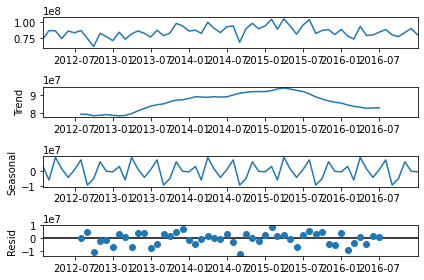

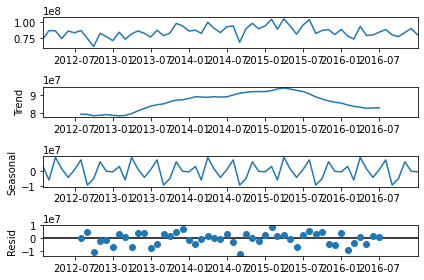

In [12]:
ets_result.plot()

In [13]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Import the library
from pmdarima import auto_arima

# Parameter analysis for ARIMA model

In [15]:
import warnings

In [16]:
warnings.filterwarnings("ignore")

In [17]:
stepwise_fit = auto_arima(dataset['Order_Demand'], start_p = 1, start_q = 1, max_p=3, max_q = 3, m =12, seasonal = True, d=None, D=1, trace= True, error_action = 'ignore', surpress_warnings = True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1656.011, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1657.591, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1654.560, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1657.739, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1651.070, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1653.068, Time=0.19 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1650.632, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1653.385, Time=0.02 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1652.620, Time=0.14 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1651.554, Time=0.06 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1651.488, Time=0.09 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1652.010, Time=0.21 sec
 ARIMA(0,1,0)(0,1,2)[12] inte

In [18]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -822.316
Date:                                 Thu, 04 Nov 2021   AIC                           1650.632
Time:                                         14:47:39   BIC                           1656.182
Sample:                                              0   HQIC                          1652.720
                                                  - 60                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.3482      0.276     -1.263      0.207      -0.889       0.192
ma.S.L24      -0.2890      0.223     -1.297      0.195      -0.726       0.148
sigma2      1.043e+14   3.45e-16   3.03e+29      0.000    1.04e+14    1.04e+14
===================================================================================
Ljung-Box (L1) (Q):                   4.49   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.03   Prob(JB):                         0.58
Heteroskedasticity (H):               1.01   Skew:                            -0.30
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.78e+45. Standard errors may be unstable.
"""

# split into train test sets

In [19]:
train = dataset.iloc[:len(dataset)-12]
test = dataset.iloc[len(dataset)-12:]

In [20]:
# Fit ARIMA model

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [22]:
model = SARIMAX(train['Order_Demand'],
               order=(0,1,0),
               seasonal_order=(0,1,[1,2],12))

In [23]:
result = model.fit()

In [24]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                            Order_Demand   No. Observations:                   48
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -611.617
Date:                                 Thu, 04 Nov 2021   AIC                           1229.234
Time:                                         14:47:39   BIC                           1233.900
Sample:                                     01-31-2012   HQIC                          1230.845
                                          - 12-31-2015                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.3117      0.305     -1.023      0.306      -0.909       0.285
ma.S.L24      -0.2382      0.206     -1.155      0.248      -0.642       0.166
sigma2      9.636e+13        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   1.93   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.17   Prob(JB):                         0.73
Heteroskedasticity (H):               0.53   Skew:                            -0.05
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.47e+45. Standard errors may be unstable.
"""

In [25]:
# Pred against test set

In [26]:
start = len(train)
end = len(train) + len(test) - 1

In [27]:
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

<AxesSubplot:xlabel='Date'>

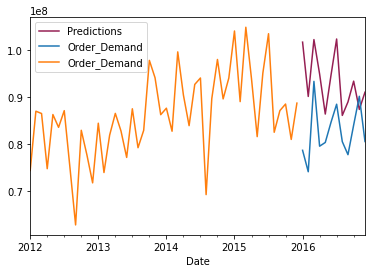

In [28]:
predictions.plot(legend = True, color = "#951f53")
test['Order_Demand'].plot(legend = True)
train['Order_Demand'].plot(legend = True)

In [29]:
#notes: https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/

# Evaluare the model using MSE and RMSE

In [30]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import accuracy_score 

In [31]:
#calculating the root mean squared error
rmse(test["Order_Demand"], predictions)

12228976.658876069

In [32]:
#calculating the mean squared error
mean_squared_error(test["Order_Demand"], predictions)

149547870123335.72

In [33]:
y_test=test["Order_Demand"].values

In [34]:
y_pred = predictions.values

In [35]:
comapre = pd.DataFrame(zip(y_test,y_pred), columns = ['y_test','y_pred'])

In [36]:
comapre['diff'] = comapre['y_pred']/(comapre['y_test']-1)

In [37]:
comapre

,y_test,y_pred,diff
0,78627619,1.016541e+08,1.292855
1,74065041,9.009375e+07,1.216414
2,93303910,1.021972e+08,1.095316
3,79503364,9.487303e+07,1.193321
4,80299593,8.634700e+07,1.075311
5,84553011,9.454459e+07,1.118169
6,88439936,1.023227e+08,1.156974
7,80471772,8.605685e+07,1.069404
8,77698896,8.893183e+07,1.144570
9,84000757,9.335134e+07,1.111316


# Futuer Pred on All Data

In [38]:
model = SARIMAX(dataset['Order_Demand'],
               order=(0,1,0),
               seasonal_order=(0,1,[1,2],12))

In [39]:
result = model.fit()

In [40]:
start_futuer = len(dataset)
end_futuer = len(dataset) + 12

In [41]:
# Predictions for one-year against the test set
predictions = result.predict(start_futuer, end_futuer,
                             typ = 'levels').rename("Predictions")

<AxesSubplot:xlabel='Date'>

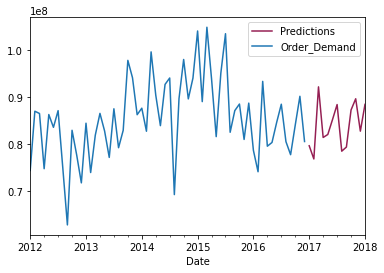

In [42]:
predictions.plot(legend = True, color = "#951f53")
dataset['Order_Demand'].plot(legend = True)

In [43]:
output = dataset.reset_index()

In [44]:
predictions

2017-01-31    7.959537e+07
2017-02-28    7.678775e+07
2017-03-31    9.213604e+07
2017-04-30    8.136279e+07
2017-05-31    8.199487e+07
2017-06-30    8.513333e+07
2017-07-31    8.836628e+07
2017-08-31    7.844622e+07
2017-09-30    7.932424e+07
2017-10-31    8.721598e+07
2017-11-30    8.960154e+07
2017-12-31    8.270573e+07
2018-01-31    8.841014e+07
Freq: M, Name: Predictions, dtype: float64

In [45]:
pred = pd.DataFrame({'Date':predictions.index, "Order_Demand":predictions.values})

In [46]:
pred

,Date,Order_Demand
0,2017-01-31,7.959537e+07
1,2017-02-28,7.678775e+07
2,2017-03-31,9.213604e+07
3,2017-04-30,8.136279e+07
4,2017-05-31,8.199487e+07
5,2017-06-30,8.513333e+07
6,2017-07-31,8.836628e+07
7,2017-08-31,7.844622e+07
8,2017-09-30,7.932424e+07
9,2017-10-31,8.721598e+07


In [47]:
full_pred_dataset = pd.concat([output,pred])

In [48]:
#full_pred_dataset.to_csv("Full Sales Prediction Dataset.csv", index =False)